In [171]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components = 100)

In [172]:
#load the image
mnist = cv2.imread('../datasets/digits.png', 0)

In [173]:
print(mnist.shape)

(1000, 2000)


In [174]:
#split the images
images = [np.hsplit(row, 100) for row in np.vsplit(mnist, 50)]
images = np.array(images, dtype = np.float32)
print(images.shape)

(50, 100, 20, 20)


In [175]:
#split into training/test
train_features = images[:, :50].reshape(-1, (20 * 20))
test_features = images[:, 50:100].reshape(-1, (20 * 20))

In [176]:
#mean normalization data
#train_features -= np.mean(train_features, axis=0)
#test_features -= np.mean(train_features, axis=0)

In [177]:
#PCA
pca.fit(train_features)
train_features = pca.transform(train_features)
test_features = pca.transform(test_features)

In [178]:
#create labels
k = np.arange(10)
train_labels = np.repeat(k, 250).reshape(-1,1)
test_labels = train_labels.copy()

In [179]:
#create KNN  Model
knn = cv2.ml.KNearest_create()

#train the KNN Model
knn.train(train_features, cv2.ml.ROW_SAMPLE, train_labels)

True

Accuracay(KNN MNIST):  92.2 %


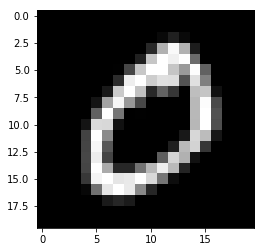

In [180]:
#use k=3
ret, result, neighbors, dist = knn.findNearest(test_features, 3)

#check if the results are correct
matches = np.equal(result, test_labels)

#convert bool to int
matches = matches.astype(np.int)

#count the correct predictions
correct = np.count_nonzero(matches)

#compute the accuracy
accuracy = (correct * 100.00) / result.size

print('Accuracay(KNN MNIST): ', accuracy, '%')

plt.imshow(images[0, 0], cmap="gray")
plt.show()

Accuracay(KNN Fashion MNIST):  70.22222222222223 %


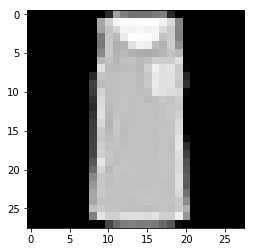

In [181]:
#KNN for fashion_MNIST

fashion_mnist = cv2.imread('../datasets/fashion.png', 0)

images = [np.hsplit(row, 30) for row in np.vsplit(fashion_mnist, 30)]
images = np.array(images, dtype = np.float32)

train_features = images[:, :15].reshape(-1, (28 * 28))
test_features = images[:, 15:30].reshape(-1, (28 * 28))

#mean normalization
#train_features -= np.mean(train_features, axis=0)
#test_features -= np.mean(train_features, axis=0)
#PCA
pca.fit(train_features)
train_features = pca.transform(train_features)
test_features = pca.transform(test_features)

k = np.arange(10)
train_labels = np.repeat(k, 45).reshape(-1,1)
test_labels = train_labels.copy()

knn = cv2.ml.KNearest_create()

knn.train(train_features, cv2.ml.ROW_SAMPLE, train_labels)
#use k=3
ret, result, neighbors, dist = knn.findNearest(test_features, 3)

#check if the results are correct
matches = np.equal(result, test_labels)

#convert bool to int
matches = matches.astype(np.int)

#count the correct predictions
correct = np.count_nonzero(matches)

#compute the accuracy
accuracy = (correct * 100.00) / result.size

print('Accuracay(KNN Fashion MNIST): ', accuracy, '%')
plt.imshow(images[0, 0], cmap="gray")
plt.show()

Accuracay(SVM MNIST):  89.16 %


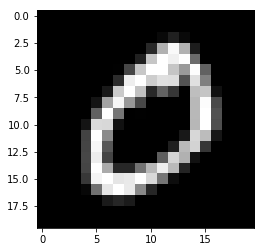

In [182]:
#SVM for MNIST

mnist = cv2.imread('../datasets/digits.png', 0)#split the images
images = [np.hsplit(row, 100) for row in np.vsplit(mnist, 50)]
images = np.array(images, dtype = np.float32)
train_features = images[:, :50].reshape(-1, (20 * 20))
test_features = images[:, 50:100].reshape(-1, (20 * 20))

#mean normalization
#train_features -= np.mean(train_features, axis=0)
#test_features -= np.mean(train_features, axis=0)
#PCA
pca.fit(train_features)
train_features = pca.transform(train_features)
test_features = pca.transform(test_features)

k = np.arange(10)
train_labels = np.repeat(k, 250).reshape(-1,1)
test_labels = train_labels.copy()

#create SVM MODEL
model = cv2.ml.SVM_create()
model.setKernel(cv2.ml.SVM_LINEAR)
model.setC(2.67)
model.setGamma(5.383)
model.setType(cv2.ml.SVM_C_SVC)

#Train SVM
model.train(train_features, cv2.ml.ROW_SAMPLE, train_labels)

#Using the Trained SVM
result = model.predict(test_features)

#Measure result
matches = np.equal(result[1], test_labels)
matches = matches.astype(np.int)
correct = np.count_nonzero(matches)
accuracy = (correct * 100.00) / result[1].size

print('Accuracay(SVM MNIST): ', accuracy, '%')

plt.imshow(images[0, 0], cmap="gray")
plt.show()

Accuracay(SVM Fashion MNIST):  72.66666666666667 %


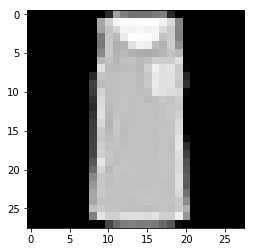

In [183]:
#SVM for fashion_MNIST

fashion_mnist = cv2.imread('../datasets/fashion.png', 0)

images = [np.hsplit(row, 30) for row in np.vsplit(fashion_mnist, 30)]
images = np.array(images, dtype = np.float32)
train_features = images[:, :15].reshape(-1, (28 * 28))
test_features = images[:, 15:30].reshape(-1, (28 * 28))

#mean normalization
#train_features -= np.mean(train_features, axis=0)
#test_features -= np.mean(train_features, axis=0)
#PCA
pca.fit(train_features)
train_features = pca.transform(train_features)
test_features = pca.transform(test_features)

k = np.arange(10)
train_labels = np.repeat(k, 45).reshape(-1,1)
test_labels = train_labels.copy()

#create SVM MODEL
model = cv2.ml.SVM_create()
model.setKernel(cv2.ml.SVM_LINEAR)
model.setC(2.67)
model.setGamma(5.383)
model.setType(cv2.ml.SVM_C_SVC)

#Train SVM
model.train(train_features, cv2.ml.ROW_SAMPLE, train_labels)

#Using the Trained SVM
result = model.predict(test_features)

#Measure result
matches = np.equal(result[1], test_labels)
matches = matches.astype(np.int)
correct = np.count_nonzero(matches)
accuracy = (correct * 100.00) / result[1].size

print('Accuracay(SVM Fashion MNIST): ', accuracy, '%')
plt.imshow(images[0, 0], cmap="gray")
plt.show()